In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Create the dates that we want to go
nowYear = datetime.datetime.now().year
nowMonth = datetime.datetime.now().month
nowDay = datetime.datetime.now().day

In [3]:
# Get the starting and ending time for our datas
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(nowYear, nowMonth, nowDay)

In [4]:
# Download the datas for each banks

# Bank of America
BAC = data.DataReader("BAC", 'quandl', start, end)

# CitiGroup
C = data.DataReader("C", 'quandl', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'quandl', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'quandl', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'quandl', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'quandl', start, end)

In [5]:
# Set the list of the banks datas
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

In [6]:
# Ceate a stocks pandas frame which contain all the bank stocks
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [7]:
# Set columns names
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [8]:
bank_stocks.head(2)

Bank Ticker     BAC                                                         \
Stock Info     Open   High    Low  Close      Volume ExDividend SplitRatio   
Date                                                                         
2017-12-14   29.065  29.18  28.71  28.73  59891544.0        0.0        1.0   
2017-12-13   29.310  29.44  28.83  28.84  78318859.0        0.0        1.0   

Bank Ticker                            ...        WFC                     \
Stock Info  AdjOpen AdjHigh AdjLow     ...        Low  Close      Volume   
Date                                   ...                                 
2017-12-14   29.065   29.18  28.71     ...      59.21  59.22  14550713.0   
2017-12-13   29.310   29.44  28.83     ...      59.38  59.40  16996351.0   

Bank Ticker                                                                    
Stock Info  ExDividend SplitRatio AdjOpen AdjHigh AdjLow AdjClose   AdjVolume  
Date                                                                           
2017-12-14         0.0        1.0   59.48   59.99  59.21    59.22  14550713.0  
2017-12-13         0.0        1.0   60.31   60.50  59.38    59.40  16996351.0  

[2 rows x 72 columns]

In [9]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3009 entries, 2017-12-14 to 2006-01-03
Data columns (total 72 columns):
(BAC, Open)          3009 non-null float64
(BAC, High)          3009 non-null float64
(BAC, Low)           3009 non-null float64
(BAC, Close)         3009 non-null float64
(BAC, Volume)        3009 non-null float64
(BAC, ExDividend)    3009 non-null float64
(BAC, SplitRatio)    3009 non-null float64
(BAC, AdjOpen)       3009 non-null float64
(BAC, AdjHigh)       3009 non-null float64
(BAC, AdjLow)        3009 non-null float64
(BAC, AdjClose)      3009 non-null float64
(BAC, AdjVolume)     3009 non-null float64
(C, Open)            3009 non-null float64
(C, High)            3009 non-null float64
(C, Low)             3009 non-null float64
(C, Close)           3009 non-null float64
(C, Volume)          3009 non-null float64
(C, ExDividend)      3009 non-null float64
(C, SplitRatio)      3009 non-null float64
(C, AdjOpen)         3009 non-null float64
(C, AdjHigh)   

In [10]:
bank_stocks.head()

Bank Ticker     BAC                                                         \
Stock Info     Open   High    Low  Close      Volume ExDividend SplitRatio   
Date                                                                         
2017-12-14   29.065  29.18  28.71  28.73  59891544.0        0.0        1.0   
2017-12-13   29.310  29.44  28.83  28.84  78318859.0        0.0        1.0   
2017-12-12   29.050  29.50  28.91  29.32  75809939.0        0.0        1.0   
2017-12-11   29.050  29.17  28.90  28.94  53618358.0        0.0        1.0   
2017-12-08   29.080  29.09  28.76  29.05  60830895.0        0.0        1.0   

Bank Ticker                            ...         WFC                     \
Stock Info  AdjOpen AdjHigh AdjLow     ...         Low  Close      Volume   
Date                                   ...                                  
2017-12-14   29.065   29.18  28.71     ...      59.210  59.22  14550713.0   
2017-12-13   29.310   29.44  28.83     ...      59.380  59.40  16996351.0   
2017-12-12   29.050   29.50  28.91     ...      58.710  60.33  24283560.0   
2017-12-11   29.050   29.17  28.90     ...      58.620  58.87  15600612.0   
2017-12-08   29.080   29.09  28.76     ...      59.145  59.31  21749452.0   

Bank Ticker                                                                     
Stock Info  ExDividend SplitRatio AdjOpen AdjHigh  AdjLow AdjClose   AdjVolume  
Date                                                                            
2017-12-14         0.0        1.0   59.48   59.99  59.210    59.22  14550713.0  
2017-12-13         0.0        1.0   60.31   60.50  59.380    59.40  16996351.0  
2017-12-12         0.0        1.0   58.71   60.56  58.710    60.33  24283560.0  
2017-12-11         0.0        1.0   59.27   59.30  58.620    58.87  15600612.0  
2017-12-08         0.0        1.0   59.71   59.92  59.145    59.31  21749452.0  

[5 rows x 72 columns]

In [11]:
# Find the Highest Closing Price for every banks stocks
bank_stocks.xs('Close', level='Stock Info', axis=1).max()

Bank Ticker
BAC     54.90
C       77.10
GS     257.68
JPM    106.95
MS      89.30
WFC     73.00
dtype: float64

In [12]:
# Create an empty return DataFrame to put the returns of each Banks for every days
returns = pd.DataFrame()

# Iterate over the pcrnt change of each banks and add it to the returns DataFrame
for bank in tickers:
    returns[bank +" Return"] = \
    bank_stocks.xs('Close', level='Stock Info', axis=1)[::-1].pct_change()[bank]

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


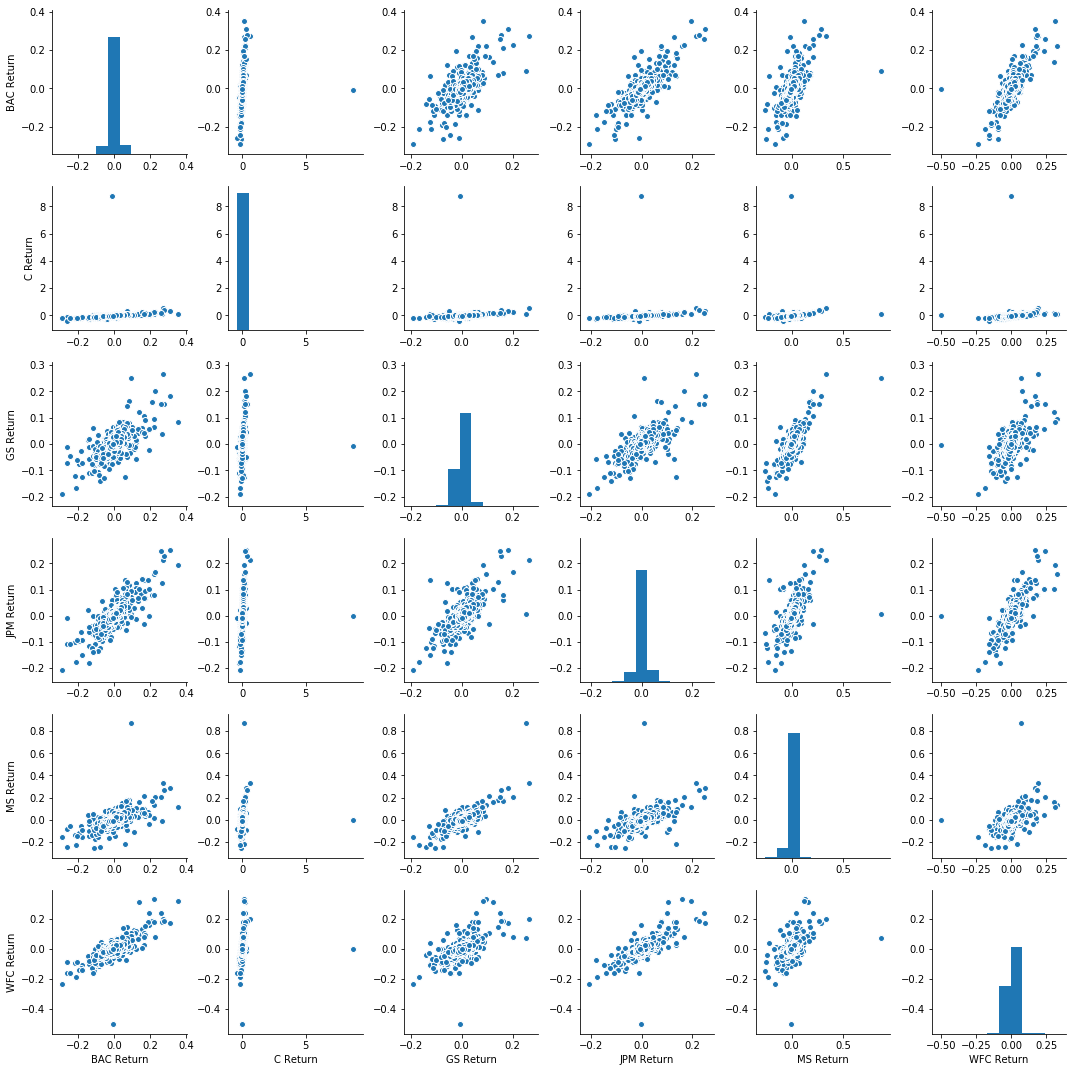

In [13]:
# Pairplot the return of each banks 
# Drop NaN variables to not get error
sns.pairplot(returns.dropna())

In [14]:
# Print the return bean for each banks
for i in returns.columns:
    print(i, ":", returns[i].mean())

BAC Return : 0.0004174520126792243
C Return : 0.0029317784232729834
GS Return : 0.0005116755338471218
JPM Return : 0.0006482509603436008
MS Return : 0.0005460609149131239
WFC Return : 0.0004260724965070856


In [15]:
# Find the date of the minimum return of all the banks stocks
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2006-08-14
dtype: datetime64[ns]

#### 2009-01-20 was the inauguration of President Barrack Obama
https://www.onthisday.com/date/2009/january/20

In [20]:
# Find the date of the standard dev of the return of all the banks stocks
print(returns.std())

print("*"*25)

# Find the date of the standard dev of the return of all the banks stocks in 2014
print(returns['2014-01-01':'2015-01-01'].std())

print("*"*25)

print(returns['2015-01-01':'2016-01-01'].std())

BAC Return    0.034227
C Return      0.163898
GS Return     0.023961
JPM Return    0.025851
MS Return     0.035298
WFC Return    0.029610
dtype: float64
*************************
BAC Return    0.013625
C Return      0.012873
GS Return     0.011042
JPM Return    0.011266
MS Return     0.013646
WFC Return    0.008839
dtype: float64
*************************
BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64


Text(0.5,1,'2015')

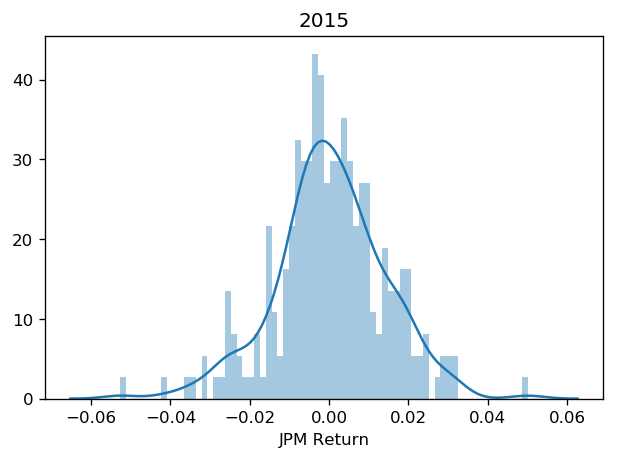

In [21]:
# Plot a distplot the returns for JPM for the year 2015
plt.figure(dpi=120)
sns.distplot(returns['2015-01-01':'2016-01-01']["JPM Return"], bins=70)
plt.title("2015")

Text(0.5,1,'2008')

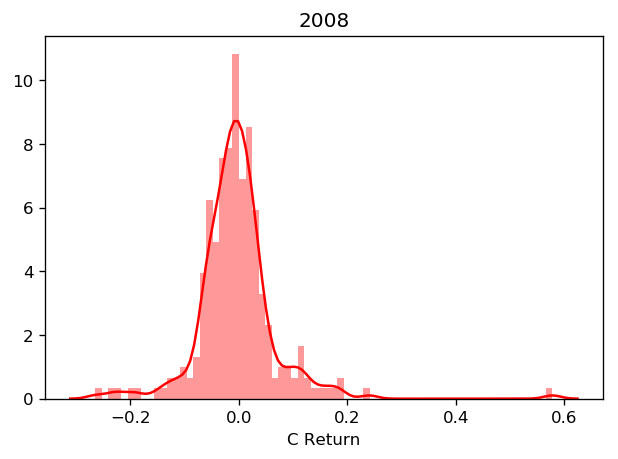

In [22]:
# Plot a distplot the returns for Citigrou for 2008
plt.figure(dpi=120)
sns.distplot(returns['2008-01-01':'2009-01-01']["C Return"], bins=70, color="r")
plt.title("2008")

In [25]:
# Set up a closing price dataframe for each banks over the years
allClosing = bank_stocks.xs("Close", level="Stock Info", axis=1)
allClosing.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2017-12-14,28.73,73.92,255.48,104.66,52.64,59.22
2017-12-13,28.84,75.14,255.56,105.51,53.18,59.40
2017-12-12,29.32,76.15,257.68,106.85,53.85,60.33
2017-12-11,28.94,75.85,250.13,105.62,52.77,58.87
2017-12-08,29.05,75.71,250.35,105.93,52.89,59.31


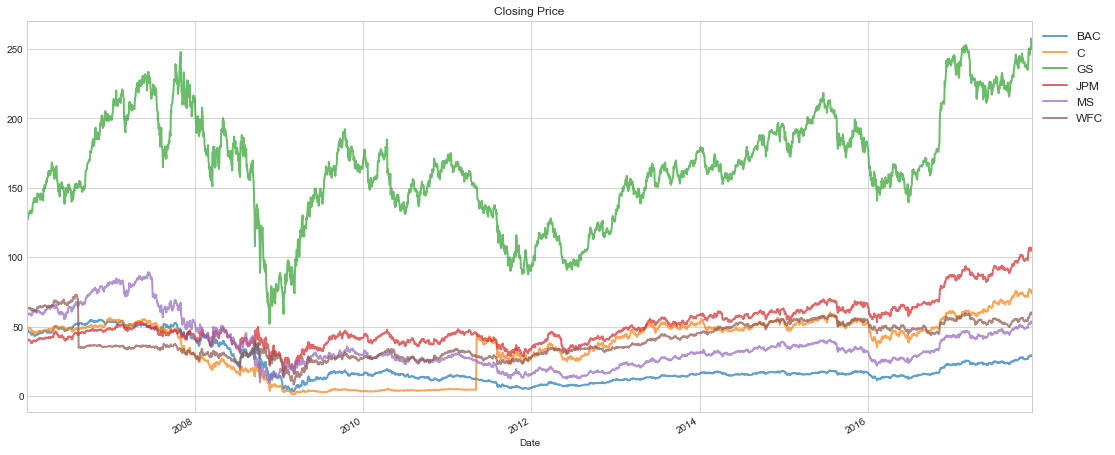

In [40]:
# Plot with plotly all the Closing price for all the banks
allClosing.plot(title="Closing Price", figsize=(18,8), lw=2, alpha=0.7).legend(bbox_to_anchor=(1, 1), fontsize=12)

Text(0,0.5,'Price')

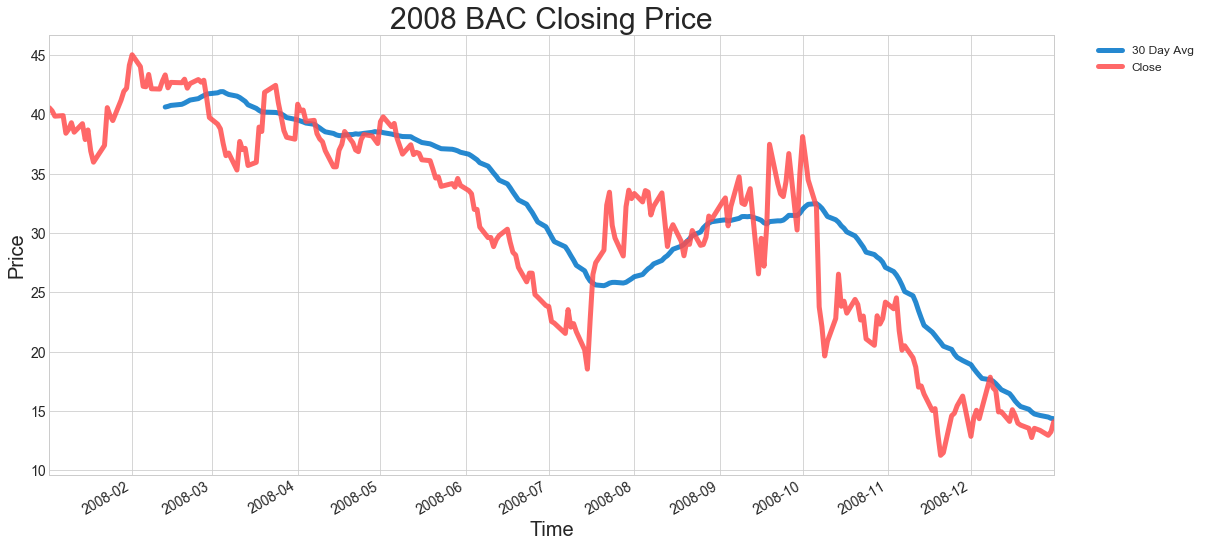

In [41]:
# Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008
mean30Days = allClosing["2009-01-01":"2008-01-01"]["BAC"][::-1].rolling(window=30).mean()
regPlot = allClosing["2009-01-01":"2008-01-01"]["BAC"]
# Concatenate both together
BAC2008 = pd.concat([mean30Days, regPlot], axis=1, keys=["30 Day Avg", "Close"])

BAC2008

fig = plt.figure(dpi=200)

# Plot them
BAC2008.plot(figsize=(18,9), lw=5, color=["#0074c8", "#ff4e4e"], alpha=0.85, fontsize=14)
plt.legend(bbox_to_anchor=(1.15, 1), fontsize=12)

plt.title("2008 BAC Closing Price", fontsize=30)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Price", fontsize=20)

Text(0.5,1,'Closing Price Correlation')

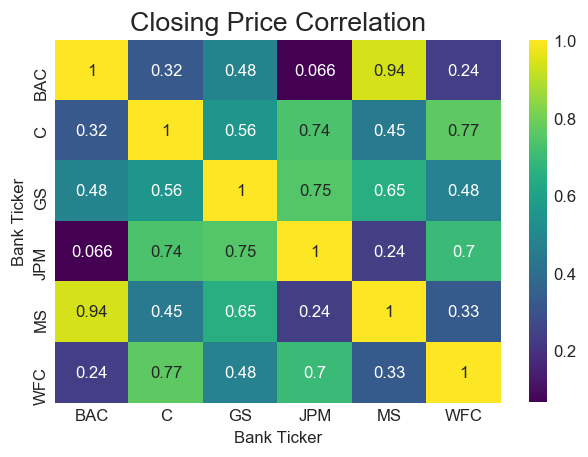

In [42]:
# Set up an heatmap for the correlation between the closing price and the banks
fig = plt.figure(dpi=120)
sns.heatmap(allClosing.corr(), cmap="viridis", annot=True)
plt.title("Closing Price Correlation", fontsize=16)

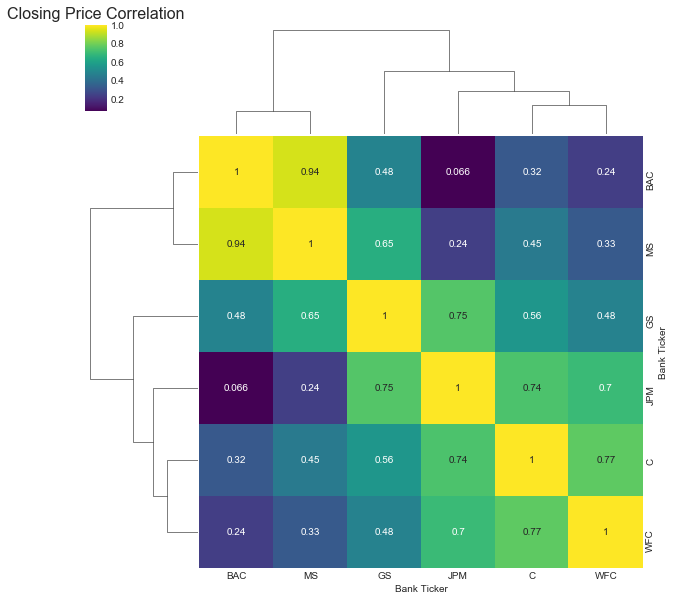

In [43]:
# Set up an clustermap to cluster the correlations together
fig = plt.figure(dpi=120)
sns.clustermap(allClosing.corr(), cmap="viridis", annot=True)
plt.title("Closing Price Correlation", fontsize=16)
plt.show()